# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [2]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [3]:
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [4]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [5]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [6]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

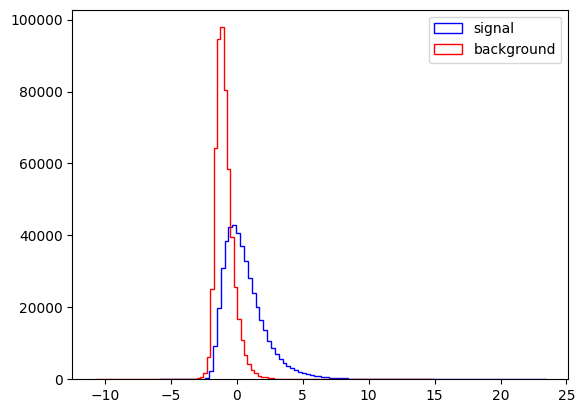

In [7]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

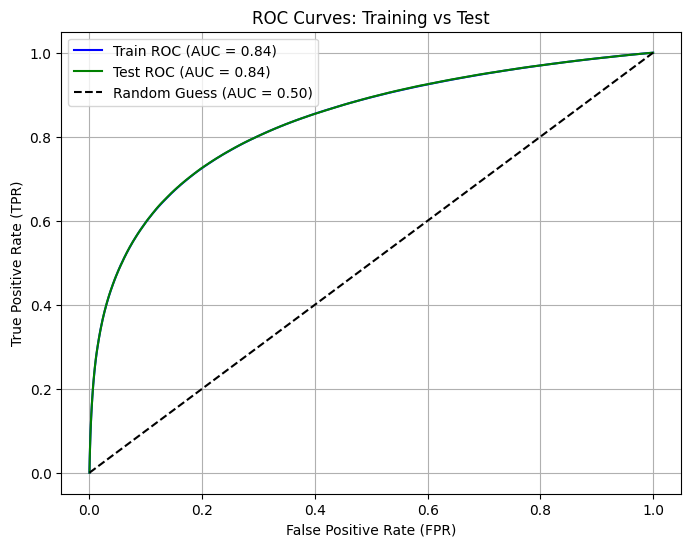

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute probability scores for training and test sets
y_Train_prob = Fisher.predict_proba(X_Train)[:, 1]  # Probability of the positive class
y_Test_prob = Fisher.predict_proba(X_Test)[:, 1]

# Compute ROC curves
fpr_train, tpr_train, _ = roc_curve(y_Train, y_Train_prob)
fpr_test, tpr_test, _ = roc_curve(y_Test, y_Test_prob)

# Compute AUC for both
auc_train = roc_auc_score(y_Train, y_Train_prob)
auc_test = roc_auc_score(y_Test, y_Test_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

plt.title('ROC Curves: Training vs Test')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
They are right on top of each other so there is no bias

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

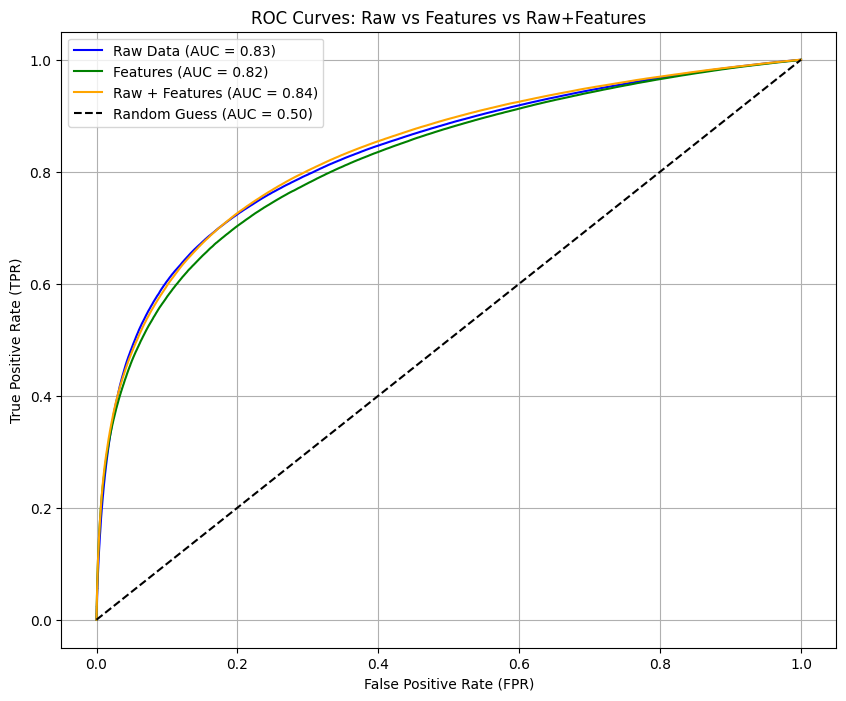

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_features = ['MET_rel', 'dPhi_r_b', 'cos_theta_r1', 'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET']

# Define different inputs
X_raw = df[low_level_features]  
X_features = df[high_level_features]  
X_combined = np.hstack([X_raw, X_features]) 

# Split data
N_Train = 4000000
X_raw_train, X_raw_test = X_raw[:N_Train], X_raw[N_Train:]
X_features_train, X_features_test = X_features[:N_Train], X_features[N_Train:]
X_combined_train, X_combined_test = X_combined[:N_Train], X_combined[N_Train:]
y_train, y_test = df['signal'][:N_Train], df['signal'][N_Train:]

# Initialize Fisher models
Fisher_raw = LinearDiscriminantAnalysis()
Fisher_features = LinearDiscriminantAnalysis()
Fisher_combined = LinearDiscriminantAnalysis()

# Train the models
Fisher_raw.fit(X_raw_train, y_train)
Fisher_features.fit(X_features_train, y_train)
Fisher_combined.fit(X_combined_train, y_train)

# Compute probabilities
y_raw_prob = Fisher_raw.predict_proba(X_raw_test)[:, 1]
y_features_prob = Fisher_features.predict_proba(X_features_test)[:, 1]
y_combined_prob = Fisher_combined.predict_proba(X_combined_test)[:, 1]

# Compute ROC curves
fpr_raw, tpr_raw, _ = roc_curve(y_test, y_raw_prob)
fpr_features, tpr_features, _ = roc_curve(y_test, y_features_prob)
fpr_combined, tpr_combined, _ = roc_curve(y_test, y_combined_prob)

# Compute AUC scores
auc_raw = roc_auc_score(y_test, y_raw_prob)
auc_features = roc_auc_score(y_test, y_features_prob)
auc_combined = roc_auc_score(y_test, y_combined_prob)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_raw, tpr_raw, label=f'Raw Data (AUC = {auc_raw:.2f})', color='blue')
plt.plot(fpr_features, tpr_features, label=f'Features (AUC = {auc_features:.2f})', color='green')
plt.plot(fpr_combined, tpr_combined, label=f'Raw + Features (AUC = {auc_combined:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

# Finalize plot
plt.title('ROC Curves: Raw vs Features vs Raw+Features')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
def compare_performance(classifier, X_raw, X_features, y, N_Train):
    
    # Combine features 
    X_combined = pd.concat([X_raw, X_features], axis=1)
    
    # Split into training and testing sets
    X_raw_train, X_raw_test = X_raw[:N_Train], X_raw[N_Train:]
    X_features_train, X_features_test = X_features[:N_Train], X_features[N_Train:]
    X_combined_train, X_combined_test = X_combined[:N_Train], X_combined[N_Train:]
    y_train, y_test = y[:N_Train], y[N_Train:]
    
    # Train classifiers
    classifier_raw = classifier.fit(X_raw_train, y_train)
    classifier_features = classifier.fit(X_features_train, y_train)
    classifier_combined = classifier.fit(X_combined_train, y_train)
    
    # Predict probabilities
    y_raw_prob = classifier_raw.predict_proba(X_raw_test)[:, 1]
    y_features_prob = classifier_features.predict_proba(X_features_test)[:, 1]
    y_combined_prob = classifier_combined.predict_proba(X_combined_test)[:, 1]
    
    # Compute ROC curves and AUC scores
    fpr_raw, tpr_raw, _ = roc_curve(y_test, y_raw_prob)
    fpr_features, tpr_features, _ = roc_curve(y_test, y_features_prob)
    fpr_combined, tpr_combined, _ = roc_curve(y_test, y_combined_prob)
    
    auc_raw = roc_auc_score(y_test, y_raw_prob)
    auc_features = roc_auc_score(y_test, y_features_prob)
    auc_combined = roc_auc_score(y_test, y_combined_prob)
    
    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    plt.plot(fpr_raw, tpr_raw, label=f'Raw Features (AUC = {auc_raw:.2f})', color='blue')
    plt.plot(fpr_features, tpr_features, label=f'High-Level Features (AUC = {auc_features:.2f})', color='green')
    plt.plot(fpr_combined, tpr_combined, label=f'Combined Features (AUC = {auc_combined:.2f})', color='orange')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
    
    # Finalize plot
    plt.title('Raw vs High-Level vs Combined Features')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


In [27]:
low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_features = ['MET_rel', 'dPhi_r_b', 'cos_theta_r1', 'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET']

X_raw = df[low_level_features]
X_features = df[high_level_features]
y = df['signal']

# Number of training samples
N_Train = 4000000

LogReg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Call the function
compare_performance(LogReg, X_raw, X_features, y, N_Train)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MET_rel
- MT2
- M_Delta_R
- M_R
- M_TR_2
- ...


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

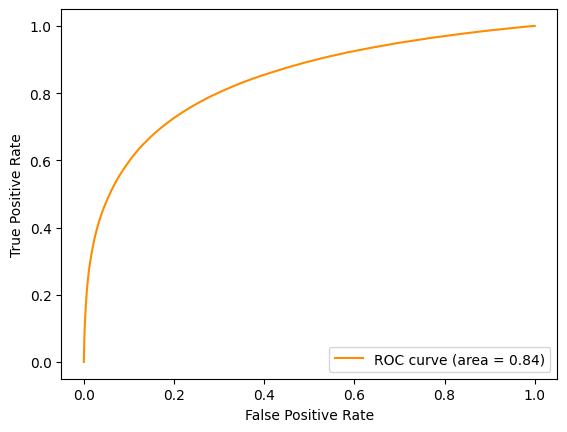

In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [30]:
def evaluate_classifier(classifier, X_raw, X_features, y, N_Train):
    # Combine features
    X_combined = pd.concat([X_raw, X_features], axis=1)
    
    # Split data into training and testing sets
    X_raw_train, X_raw_test = X_raw[:N_Train], X_raw[N_Train:]
    X_features_train, X_features_test = X_features[:N_Train], X_features[N_Train:]
    X_combined_train, X_combined_test = X_combined[:N_Train], X_combined[N_Train:]
    y_train, y_test = y[:N_Train], y[N_Train:]
    
    # Ensure the feature names match by reordering columns to match the training data
    X_raw_test = X_raw_test[X_raw_train.columns]
    X_features_test = X_features_test[X_features_train.columns]
    X_combined_test = X_combined_test[X_combined_train.columns]
    
    # Train classifiers on raw, features, and combined inputs
    classifier_raw = classifier.fit(X_raw_train, y_train)
    classifier_features = classifier.fit(X_features_train, y_train)
    classifier_combined = classifier.fit(X_combined_train, y_train)
    
    # Make predictions
    y_raw_pred = classifier_raw.predict(X_raw_test)
    y_features_pred = classifier_features.predict(X_features_test)
    y_combined_pred = classifier_combined.predict(X_combined_test)
    
    # Compute probabilities for ROC curve
    y_raw_prob = classifier_raw.predict_proba(X_raw_test)[:, 1]
    y_features_prob = classifier_features.predict_proba(X_features_test)[:, 1]
    y_combined_prob = classifier_combined.predict_proba(X_combined_test)[:, 1]
    
    # Compute ROC curves and AUC
    fpr_raw, tpr_raw, _ = roc_curve(y_test, y_raw_prob)
    fpr_features, tpr_features, _ = roc_curve(y_test, y_features_prob)
    fpr_combined, tpr_combined, _ = roc_curve(y_test, y_combined_prob)
    
    auc_raw = roc_auc_score(y_test, y_raw_prob)
    auc_features = roc_auc_score(y_test, y_features_prob)
    auc_combined = roc_auc_score(y_test, y_combined_prob)
    
    # Compute Precision, Recall, F1 Score, and Accuracy
    precision_raw = precision_score(y_test, y_raw_pred)
    recall_raw = recall_score(y_test, y_raw_pred)
    f1_raw = f1_score(y_test, y_raw_pred)
    accuracy_raw = accuracy_score(y_test, y_raw_pred)
    
    precision_features = precision_score(y_test, y_features_pred)
    recall_features = recall_score(y_test, y_features_pred)
    f1_features = f1_score(y_test, y_features_pred)
    accuracy_features = accuracy_score(y_test, y_features_pred)
    
    precision_combined = precision_score(y_test, y_combined_pred)
    recall_combined = recall_score(y_test, y_combined_pred)
    f1_combined = f1_score(y_test, y_combined_pred)
    accuracy_combined = accuracy_score(y_test, y_combined_pred)
    
    # Create a DataFrame to summarize the results
    metrics = {
        "Metric": ["AUC", "Precision", "Recall", "F1 Score", "Accuracy"],
        "Raw Data": [auc_raw, precision_raw, recall_raw, f1_raw, accuracy_raw],
        "Features": [auc_features, precision_features, recall_features, f1_features, accuracy_features],
        "Raw + Features": [auc_combined, precision_combined, recall_combined, f1_combined, accuracy_combined]
    }
    
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_features = ['MET_rel', 'dPhi_r_b', 'cos_theta_r1', 'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET']

X_raw = df[low_level_features]
X_features = df[high_level_features]
y = df['signal']

# Number of training samples
N_Train = 4000000

# Initialize Logistic Regression model
LogReg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Evaluate the classifier and get the results
metrics_df = evaluate_classifier(LogReg, X_raw, X_features, y, N_Train)

# Display the results
print(metrics_df)



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MET_rel
- MT2
- M_Delta_R
- M_R
- M_TR_2
- ...
